In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root_path = os.getcwd().replace('Stats', 'Dataset'+os.sep)
for root,dirs,files in os.walk(root_path):
    if root == root_path:
        datasets = files

In [3]:
datasets = {
    dataset[:dataset.index('.')] : pd.read_csv(root_path + dataset) 
    for dataset in datasets
}

In [4]:
datasets.keys()

dict_keys(['starting-salary', 'noise-level', 'cancer-cases', 'insurance', 'temperature-defects', 'airline-accidents', 'items-lifetime'])

In [5]:
df = datasets['airline-accidents'].copy()

In [6]:
df = df.rename(columns={'Accidents': 'Frequency'})

In [7]:
"""
Frequency table are used to represent small distinct values
"""
df

,Year,Frequency
0,1997,25
1,1998,20
2,1999,21
3,2000,18
4,2001,13
5,2002,13
6,2003,7
7,2004,9
8,2005,18


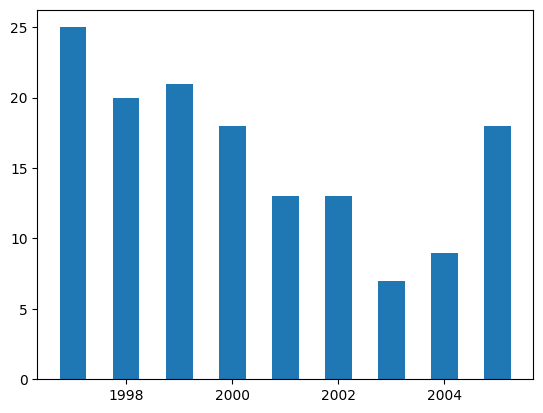

In [8]:
"""
Frequency table can be represented graphically using bar graph
"""
plt.bar(df['Year'], df['Frequency'], width=0.5) # Bar graph
plt.show()

In [9]:
df['Relative Frequency'] = df['Frequency'] / df['Frequency'].sum()

In [10]:
df

,Year,Frequency,Relative Frequency
0,1997,25,0.173611
1,1998,20,0.138889
2,1999,21,0.145833
3,2000,18,0.125000
4,2001,13,0.090278
5,2002,13,0.090278
6,2003,7,0.048611
7,2004,9,0.062500
8,2005,18,0.125000


In [11]:
df['Relative Frequency'].sum()

1.0

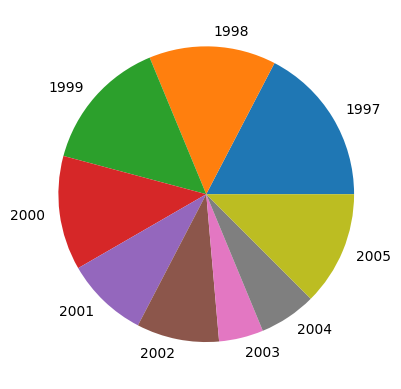

In [12]:
plt.pie(df['Relative Frequency'], labels=df['Year'])
plt.show()

In [13]:
"""
From the pie chart, we can infer that 19's accident contribute around 45% whereas
After 6 year together contribute 55% so we can say that, airline accident is reduced
"""
df[df['Year'] < 2000].iloc[:,2].sum() * 100

45.833333333333336

In [14]:
df = datasets['items-lifetime'].copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Item Lifetime  200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [16]:
"""
If the number of distinct value is large, then use class intervals
"""
df.min(), df.max()

(Item Lifetime    521
 dtype: int64,
 Item Lifetime    1425
 dtype: int64)

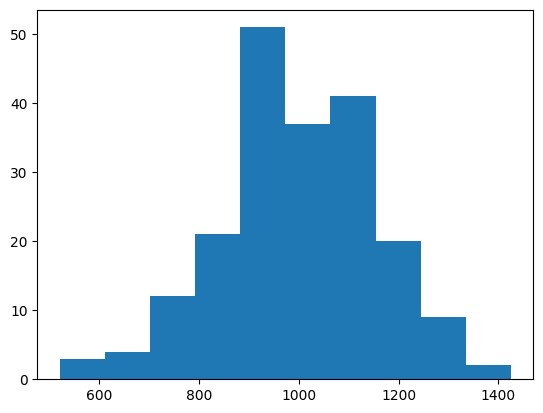

In [17]:
"""
Range(521, 1425) can split into 10 bins
"""
plt.hist(df.iloc[:,0], bins=10)
plt.show()

In [19]:
"""
From the graph, we can infer that the distribution is approximately normal

sample median = sample mean (approx.)
"""
df.describe()

,Item Lifetime
count,200.000000
mean,998.130000
std,157.862459
min,521.000000
25%,909.750000
50%,997.000000
75%,1107.000000
max,1425.000000


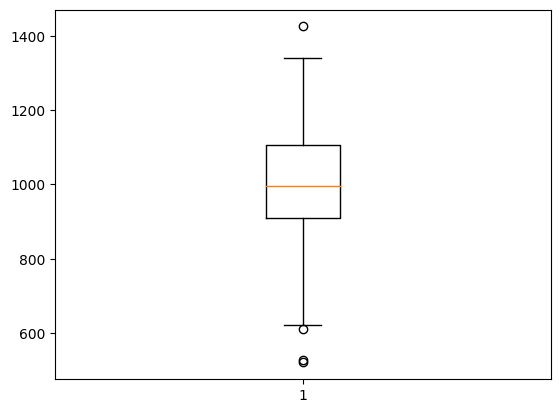

In [20]:
"""
Box-Whisker plot is a graphically representation of quantiles
    Length of Box = Interquantile Range (Q3 - Q1)
    Length of Whisker = 1.5 * IQR
"""
plt.boxplot(df['Item Lifetime'])
plt.show()

In [21]:
"""
Cummulative Frequency
"""
df2 = pd.DataFrame(
    df['Item Lifetime'].value_counts().sort_index().items(), 
    columns=['Item Lifetime','Frequency'])

In [22]:
df2['Cummulative Frequency'] = df2['Frequency'].cumsum() / df2['Frequency'].sum() * 100

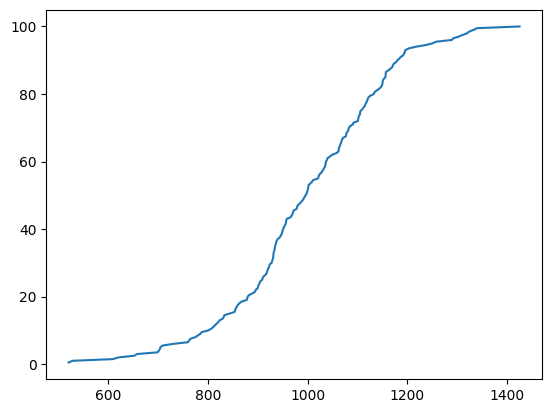

In [23]:
"""
Relative Cummulative Frequency plot can be used to find the percentiles
"""
plt.plot(df2['Item Lifetime'], df2['Cummulative Frequency'])
plt.show()

In [24]:
"""
Chebyshev's inequality (for any distribution)
|S_k| / n > 1 - (1 / k**2) where, S_k be i: abs(xi - x_mean) < ks

There is also one-sided inequality
|N_k| / n <= 1 / (1 + k**2) where, N_k be i: xi - x_mean >= ks
"""
k = 1.5

In [25]:
x = df['Item Lifetime'].values

In [26]:
x.shape

(200,)

In [29]:
m_x, s_x = np.mean(x), np.std(x)
m_x, s_x

(998.13, 157.46730803566814)

In [30]:
rng = m_x - k*s_x, m_x + k*s_x
rng

(761.9290379464978, 1234.3309620535022)

In [31]:
"""
By Chebyshev inequality, number of values in rng (761, 1234) should be greater than
111
"""
round((1 - 1 / k**2) * x.size)

111

In [32]:
"""
175 > 111, Chebyshev's inequality holds
"""
np.count_nonzero((x > rng[0]) & (x < rng[1]))

175

In [33]:
"""
Now, let's verify the one-sided inequality
|N_k| / n <= 1 / (1 + k**2)
"""
round((1 / (1 + k**2)) * x.size)

62

In [34]:
"""
12 <= 62, Chebyshev's one-sided inequality also holds
"""
np.count_nonzero(x >= rng[1])

12